In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nsa = pd.read_csv("./benchmark_result/qh=64-kh=4-head_dim=128-nsa=True.csv")
fa = pd.read_csv("./benchmark_result/qh=64-kh=4-head_dim=128-nsa=False.csv")
nsa['x_labels'] = nsa.apply(lambda x: f"b={int(x["num_seqs"])}\ns={int(x["seqlen"])}", axis=1)

In [3]:
nsa

,Unnamed: 0,num_seqs,seqlen,output_tokens,prefill_throughput,decode_throughput,x_labels
0,0,512,8192,256,91629.61,22702.69,b=512\ns=8192
1,1,512,16384,256,92173.16,18303.78,b=512\ns=16384
2,2,256,32768,256,87836.68,11655.76,b=256\ns=32768
3,3,256,65536,256,79895.97,7184.28,b=256\ns=65536
4,4,256,122880,256,67922.46,4194.66,b=256\ns=122880


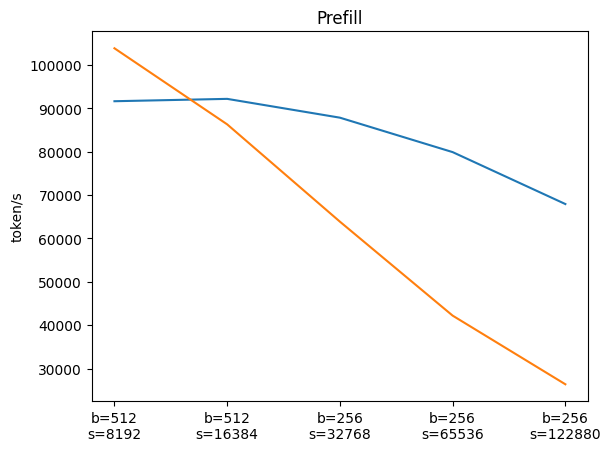

In [4]:
plt.plot(nsa["x_labels"], nsa["prefill_throughput"])
plt.plot(nsa["x_labels"], fa["prefill_throughput"])
plt.title("Prefill")
plt.ylabel("token/s")
plt.show()

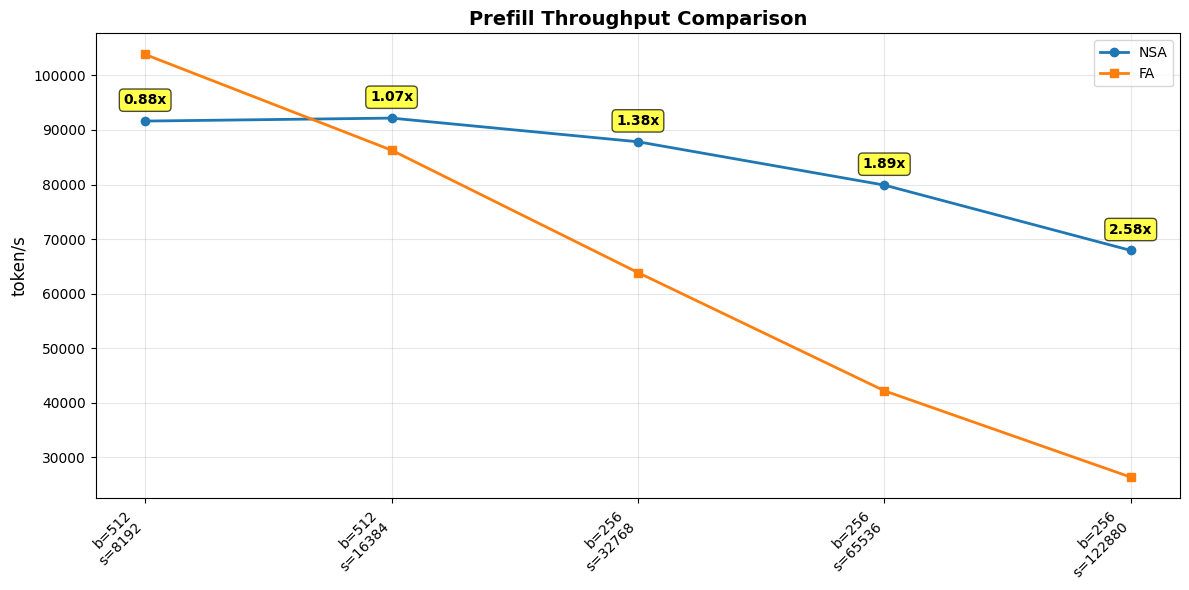

In [5]:


plt.figure(figsize=(12, 6))

# 绘制两条线
line1, = plt.plot(nsa["x_labels"], nsa["prefill_throughput"], marker='o', label='NSA', linewidth=2)
line2, = plt.plot(nsa["x_labels"], fa["prefill_throughput"], marker='s', label='FA', linewidth=2)

plt.title("Prefill Throughput Comparison", fontsize=14, fontweight='bold')
plt.ylabel("token/s", fontsize=12)
plt.legend()

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 在每个数据点上显示倍数关系
for i, (nsa_val, fa_val) in enumerate(zip(nsa["prefill_throughput"], fa["prefill_throughput"])):
    if fa_val != 0:  # 避免除零错误
        ratio = nsa_val / fa_val
        # 在数据点上方显示倍数
        plt.annotate(f'{ratio:.2f}x', 
                    xy=(i, nsa_val), 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    va='bottom',
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

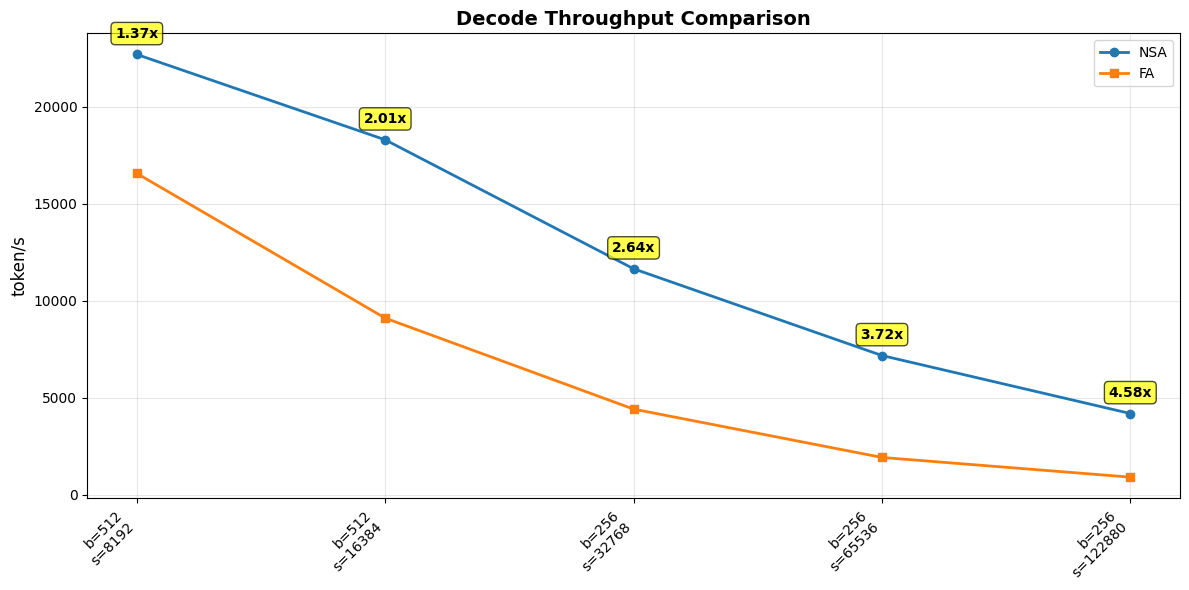

In [6]:
plt.figure(figsize=(12, 6))

# 绘制两条线
line1, = plt.plot(nsa["x_labels"], nsa["decode_throughput"], marker='o', label='NSA', linewidth=2)
line2, = plt.plot(nsa["x_labels"], fa["decode_throughput"], marker='s', label='FA', linewidth=2)

plt.title("Decode Throughput Comparison", fontsize=14, fontweight='bold')
plt.ylabel("token/s", fontsize=12)
plt.legend()

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 在每个数据点上显示倍数关系
for i, (nsa_val, fa_val) in enumerate(zip(nsa["decode_throughput"], fa["decode_throughput"])):
    if fa_val != 0:  # 避免除零错误
        ratio = nsa_val / fa_val
        # 在数据点上方显示倍数
        plt.annotate(f'{ratio:.2f}x', 
                    xy=(i, nsa_val), 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    va='bottom',
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()